In [42]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os
import json

PARQA = os.getenv('PARQA')

In [20]:
pg = gp.read_file(PARQA + 'data/DPR_SchoolyardsToPlaygrounds_001/DPR_SchoolyardsToPlaygrounds_001.shp')

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


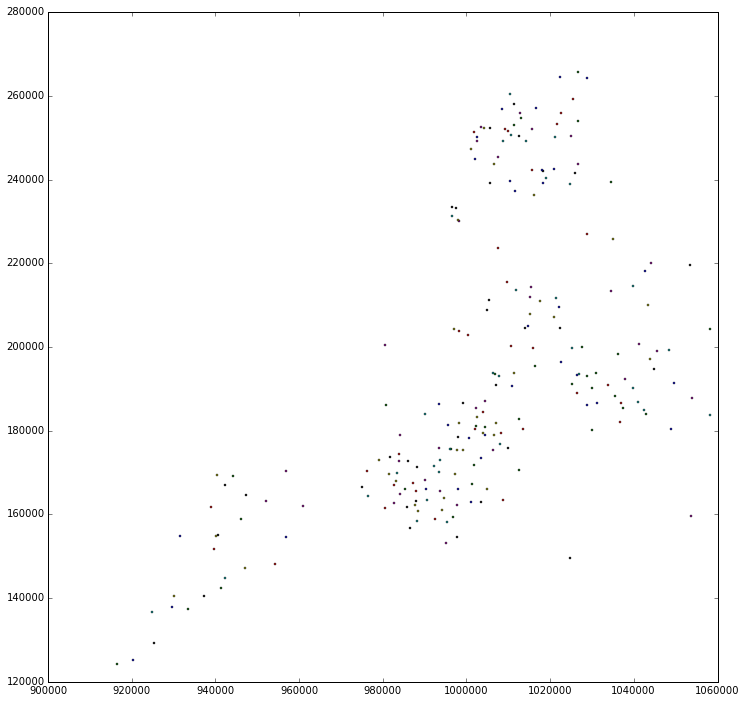

In [21]:
pg2 = pg[['BOROUGH','LOCATION','EAPPLY','GISPROPNUM','geometry']]
pg2['geometry'] = pg2.geometry.centroid
pg2.plot(figsize=(12,12));

In [22]:
with open(PARQA + 'data/school_playgrounds.json', 'w') as rfile:
    json.dump(pg2.to_json(), rfile)


In [44]:
pg2 = pg2.replace('Null', np.nan)

In [45]:
pg3 = pg2[pd.notnull(pg2['EAPPLY'])].rename(columns={'EAPPLY':'PSID'})
pg3[['BOROUGH', 'LOCATION','PSID', 'GISPROPNUM']].to_csv(PARQA + 'data/sch_playground_names.csv')

In [46]:
pg3.tail()

,BOROUGH,LOCATION,PSID,GISPROPNUM,geometry
196,Q,Christie Ave. bet.ween 99 St. and 98 St.,I.S. 61,QS35,POINT (1022203.511104972 209470.1627603647)
198,Q,50 St. bet. 31 Ave. and 30 Ave.,P.S. 151,QS55,POINT (1009796.152520242 215590.2895971173)
199,X,W. 177 St. bet.ween W. Tremont Ave. and Jerome...,P.S. 306,XS11,POINT (1008813.492330626 249220.1708982144)
200,Q,"132 Ave., 132 Rd. bet. 218 St. and 220 St.",P.S. 132,QS56,POINT (1053852.933374721 187815.3046224349)
201,B,E. 23 St. bet.ween Campus Rd. and Glenwood Rd.,P.S. 152,BS43,POINT (997194.5755146353 169762.0696064254)
